<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/22_Predicting_House_Prices_by_employing_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b> Predicting House Prices by employing ANN </b></div>



# Problem Statement

#### In the real estate market, understanding the factors that influence house prices is crucial for both buyers and sellers. The dataset at hand captures the sale prices of homes in King County, USA, covering transactions that occurred between May 2014 and May 2015. This dataset, sourced from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction), offers a rich set of features that can be used to predict house prices and gain insights into the housing market dynamics during this period.

## Dataset Overview

##### The dataset includes a wide array of attributes related to the homes sold, such as:

- **ida**: Unique identifier for each house.
- **date**: The date when the house was sold.
- **price**: The sale price of the house, which serves as the prediction target.
- **bedrooms**: Number of bedrooms in the house.
- **bathrooms**: Number of bathrooms in the house.
- **sqft_living**: The living area in square footage.
- **sqft_lot**: The size of the lot in square footage.
- **floors**: The total number of floors in the house.
- **waterfront**: Whether the house has a view of the waterfront.
- **view**: Indicates if the house has been viewed by potential buyers.
- **condition**: The overall condition of the house.
- **grade**: The quality grade of the house based on King County’s grading system.
- **sqft_above**: Square footage of the house, excluding the basement.
- **sqft_basement**: Square footage of the basement.
- **yr_built**: The year the house was built.
- **yr_renovated**: The year the house was last renovated.
- **zipcode**: The ZIP code of the house.
- **lat**: Latitude coordinate of the house.
- **long**: Longitude coordinate of the house.
- **sqft_living15**: The living room area in 2015, reflecting any renovations.
- **sqft_lot15**: The lot size in 2015, reflecting any renovations.

## Objective

#### The primary goal of this project is to build a predictive model that can accurately estimate the sale price of houses based on the features provided. By doing so, we aim to uncover the key factors that drive house prices in King County during the specified period, offering valuable insights for future buyers, sellers, and real estate professionals


#

# *1.Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#

# *2.Import Dataset*

In [ ]:
encoding = 'ISO-8859-1'
df=pd.read_csv('/Users/maegbug/Desktop/ARTIFICIAL INTELLIGENT/Courses/ML Regression Course Package/8. ANN for Regression Tasks/kc_house_data.csv', encoding=encoding)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#

# *3.Data Analysis and Visualization*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: xlabel='sqft_living', ylabel='price'>

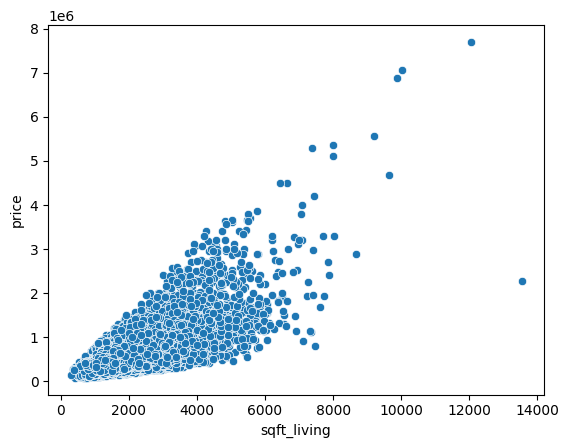

In [ ]:
sns.scatterplot(x='sqft_living', y='price', data=df)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

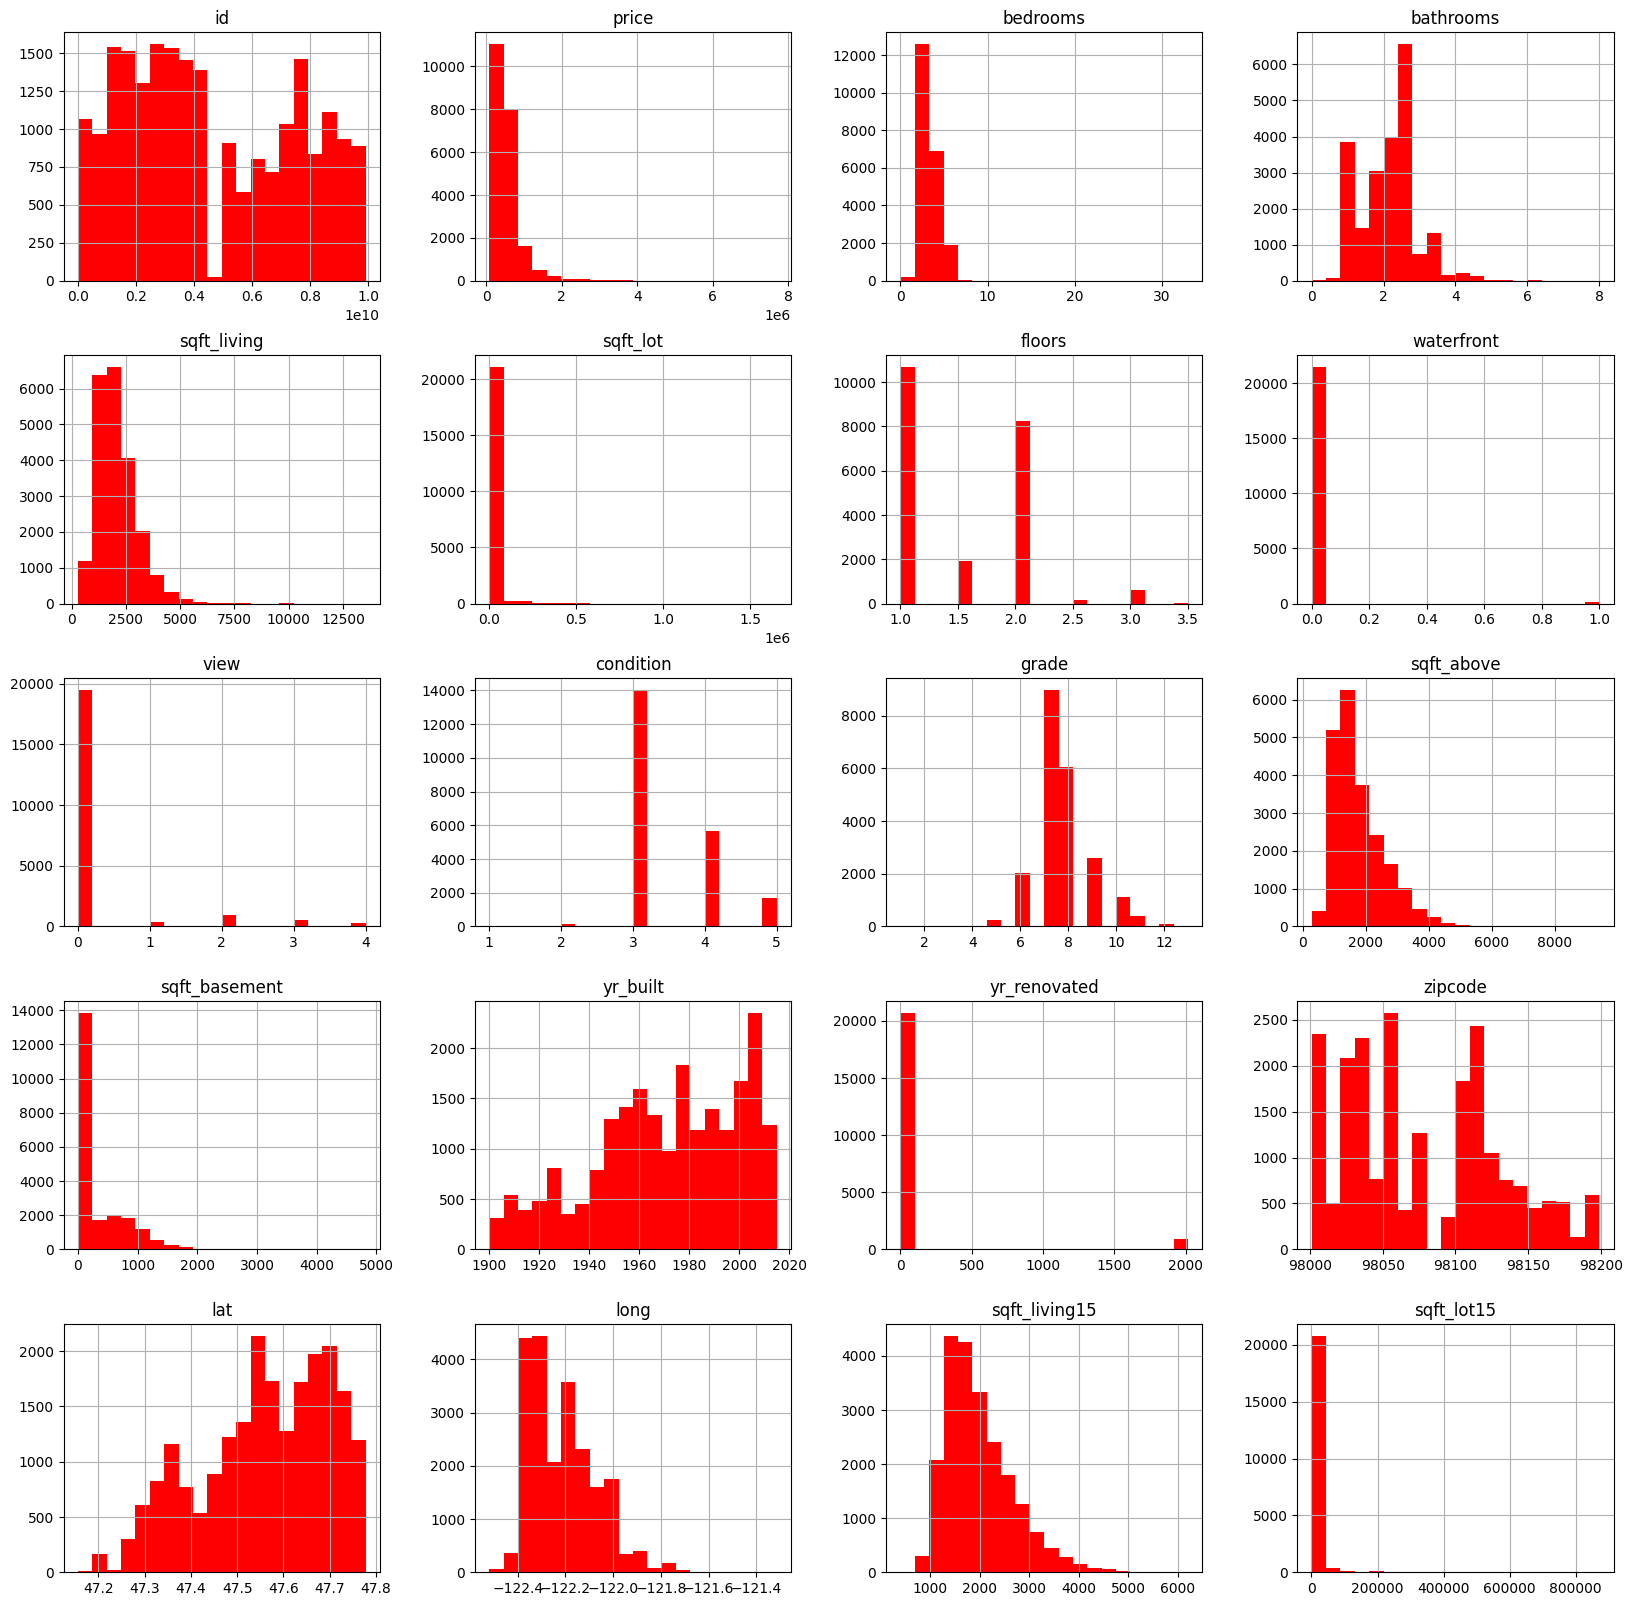

In [ ]:
df.hist(bins=20,figsize=(20,20),color='r')

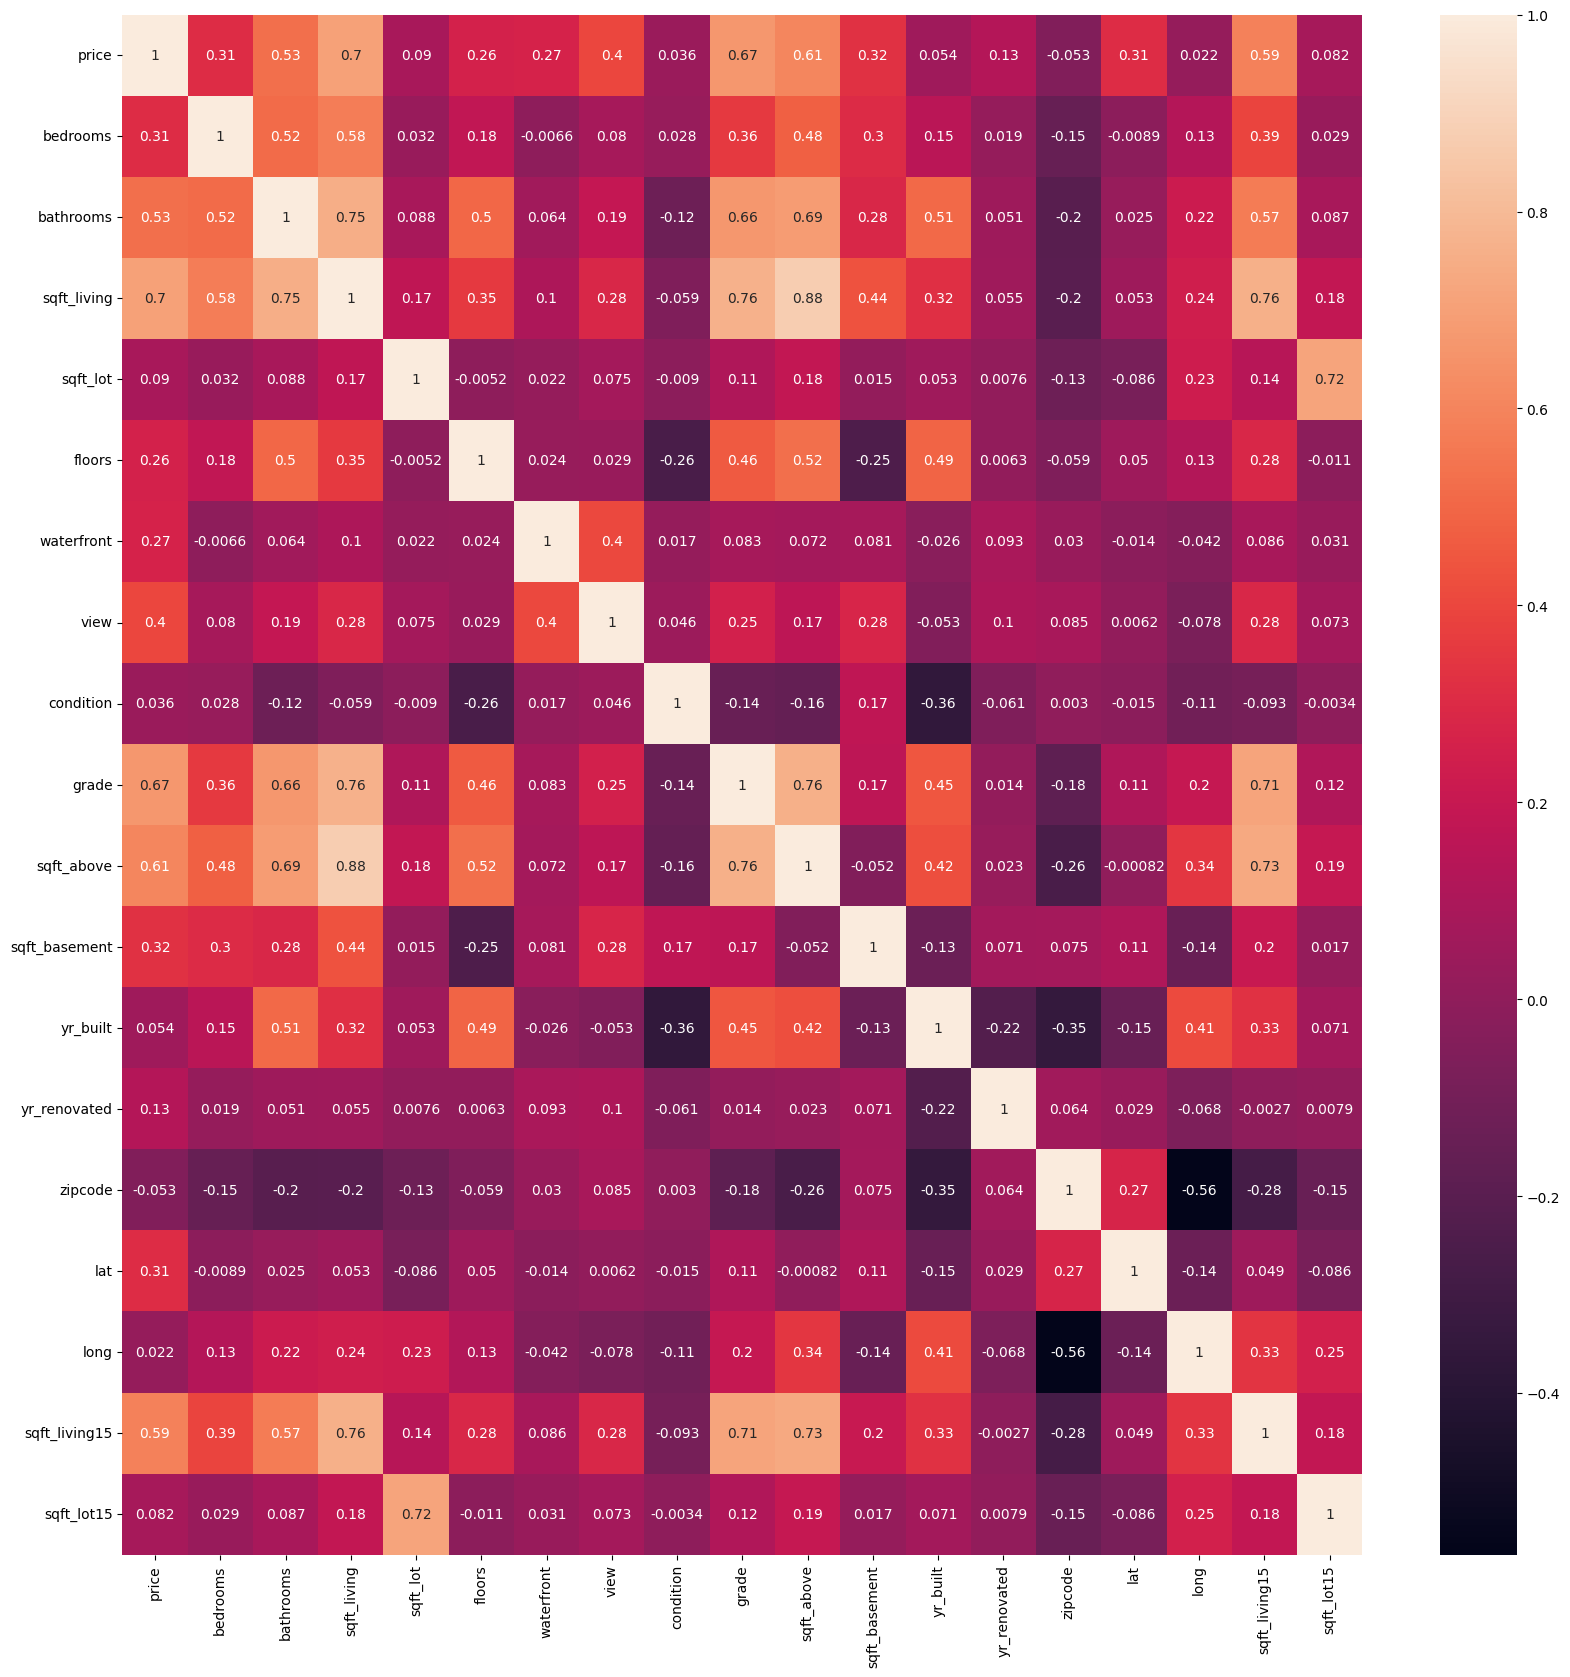

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.drop(['date', 'id'], axis=1).corr(), annot=True, ax=ax)

plt.show()

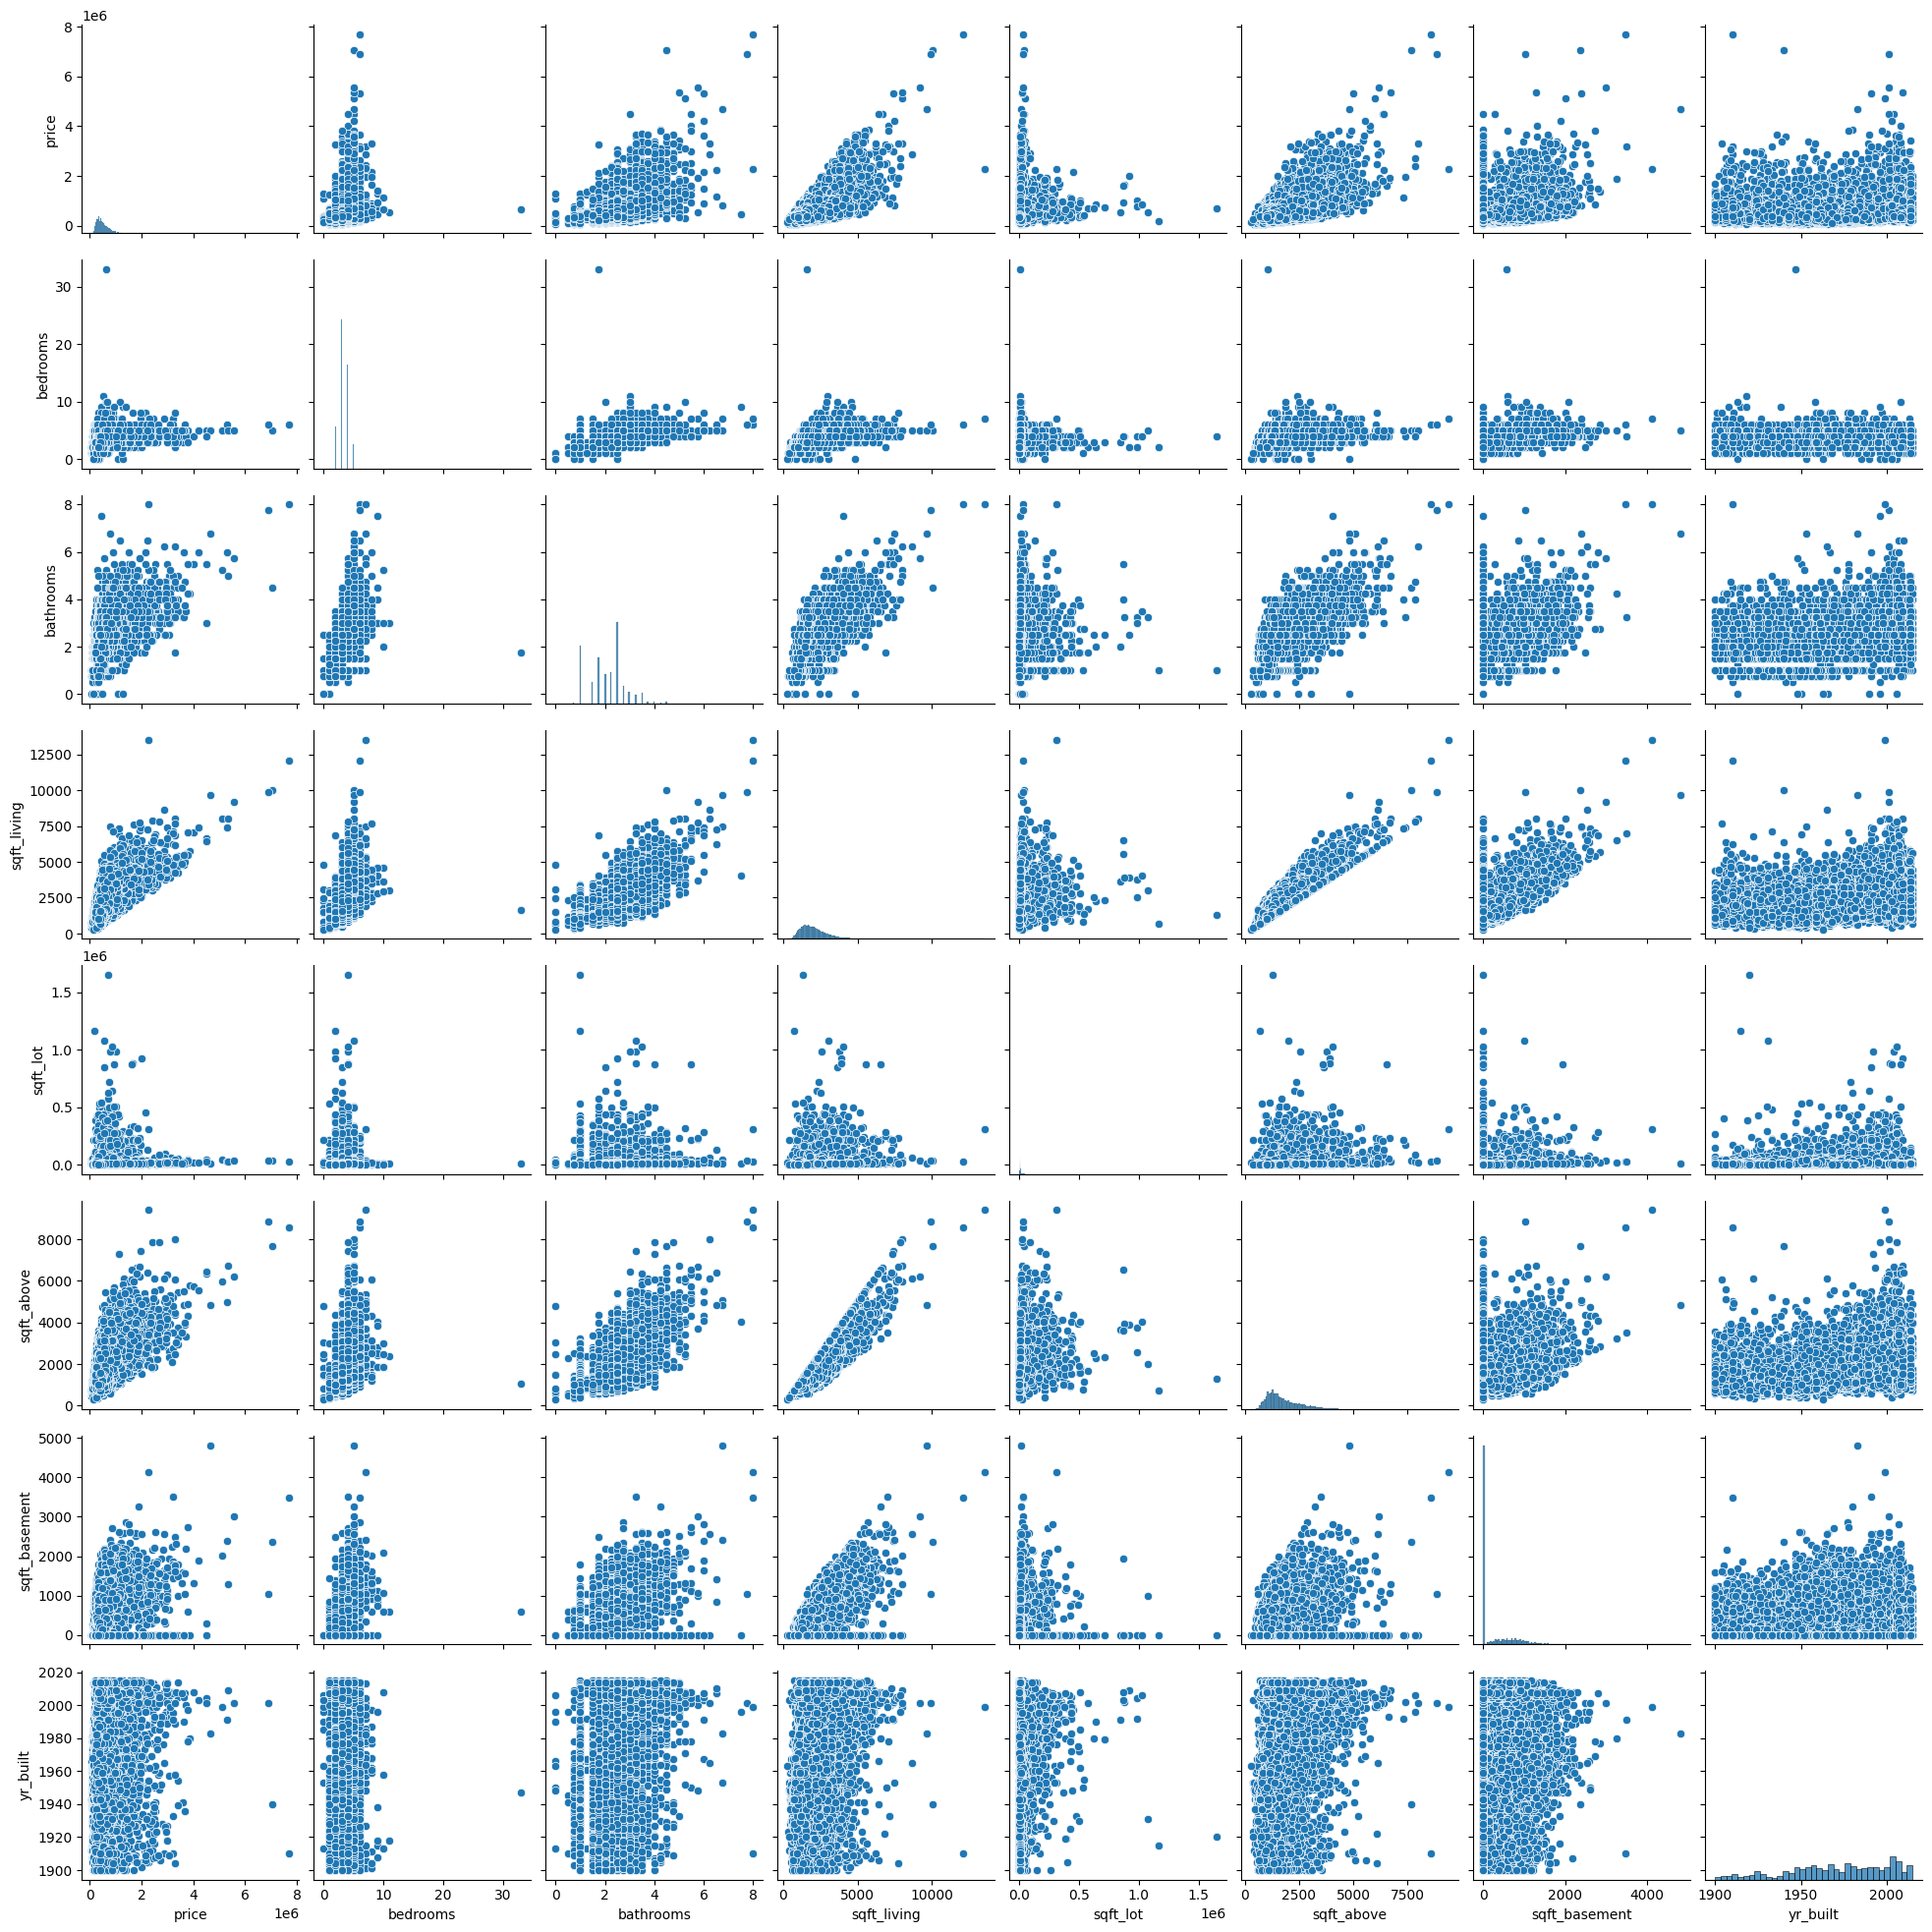

In [ ]:
house_df_sample = df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]
sns.pairplot(house_df_sample)

#

# *4.Split data to Train and Test*

In [ ]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']
X = df[selected_features]
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#

# *5.Train the Model*

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Add layers to the model
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

2024-08-22 12:11:48.036761: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 419849371648.0000 - val_loss: 396238553088.0000
Epoch 2/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 410977337344.0000 - val_loss: 383933382656.0000
Epoch 3/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 414994628608.0000 - val_loss: 355585949696.0000
Epoch 4/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 362765975552.0000 - val_loss: 309525086208.0000
Epoch 5/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 307504513024.0000 - val_loss: 253429874688.0000
Epoch 6/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 268312428544.0000 - val_loss: 196925390848.0000
Epoch 7/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 206213218304.0000 - val_loss: 148272840704.0000
Epoch 8/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 152837390336.0000 - val_loss: 113962909696.0000
Epoch 9/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 112800178176.0000 - val_loss: 94540259328.0000
Epoch 10/50
433/433 ━━━━━━━━━

In [ ]:
model.save('model.h5')

import netron
netron.start('model.h5')

Serving 'model.h5' at http://localhost:8080


('localhost', 8080)

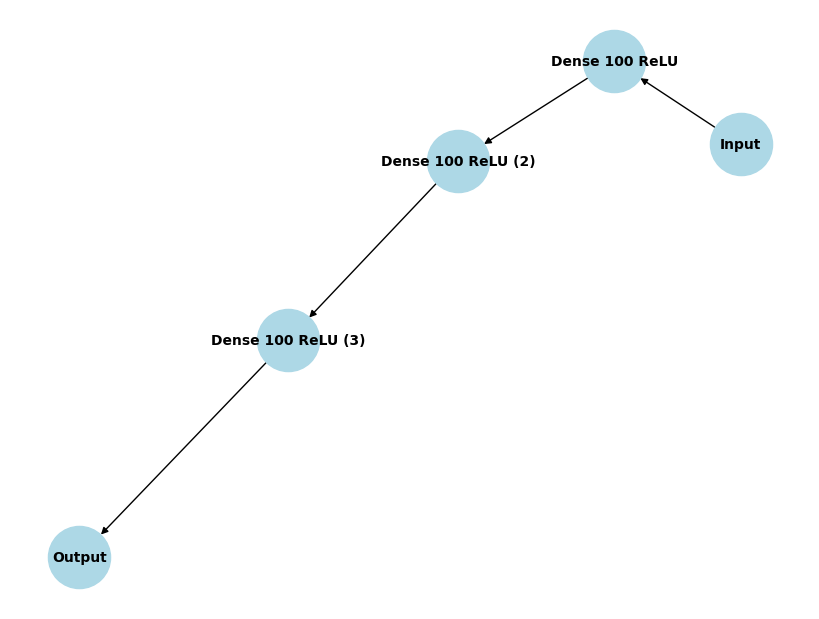

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_node("Input")
G.add_node("Dense 100 ReLU")
G.add_node("Dense 100 ReLU (2)")
G.add_node("Dense 100 ReLU (3)")
G.add_node("Output")

G.add_edges_from([("Input", "Dense 100 ReLU"),
                  ("Dense 100 ReLU", "Dense 100 ReLU (2)"),
                  ("Dense 100 ReLU (2)", "Dense 100 ReLU (3)"),
                  ("Dense 100 ReLU (3)", "Output")])


plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
plt.show()



#

# *6.Evaluation*

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

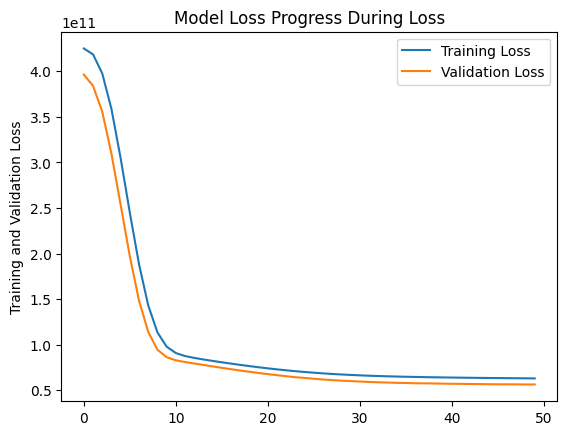

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Progress During Loss')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f'Test Loss: {loss}')


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74166984704.0000
Test Loss: 72844935168.0


In [ ]:
# Generate predictions
y_predict = model.predict(X_test_scaled)
y_predict = y_predict.flatten()  # Flatten the predictions array to match the true values


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# predictions

import joblib
import tensorflow as tf

# Save the trained model
model.save('your_trained_model.h5')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('your_trained_model.h5')

# Load the scaler
scaler = joblib.load('scaler.pkl')

def predict_price(model, scaler, input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data], columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement'])

    # Preprocess the input data (scale it)
    input_scaled = scaler.transform(input_df)

    # Make prediction
    predicted_price = model.predict(input_scaled)

    return predicted_price[0][0]
input_data = {
    'bedrooms': 1,
    'bathrooms': 1,
    'sqft_living': 2000,
    'sqft_lot': 6000,
    'floors': 1,
    'sqft_above': 1180,
    'sqft_basement': 0
}

# Predict the price
predicted_price = predict_price(model, scaler, input_data)

print(f'The predicted price is: ${predicted_price:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The predicted price is: $429377.38


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


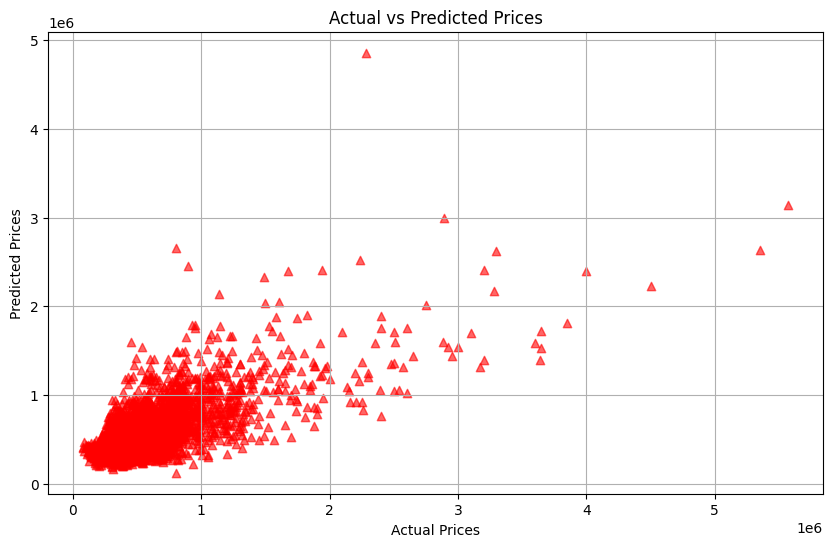

In [ ]:
y_predict = model.predict(X_test_scaled)
y_predict = y_predict.flatten()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, color='r', marker='^', alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Number of features (input variables)
k = X_test_scaled.shape[1]

# Number of samples
n = len(X_test_scaled)

# Calculate metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Print metrics
print(f'RMSE = {RMSE}')
print(f'MSE = {MSE}')
print(f'MAE = {MAE}')
print(f'R² = {r2}')
print(f'Adjusted R² = {adj_r2}')

RMSE = 269897.998
MSE = 72844929079.52116
MAE = 174538.80791334144
R² = 0.5181471538039927
Adjusted R² = 0.5173654690013572
